In [4]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.Collecting matplotlib
                                              0.0/7.6 MB ? eta -:--:--
                                              0.1/7.6 MB 1.7 MB/s eta 0:00:05
                                              0.2/7.6 MB 2.1 MB/s eta 0:00:04
     -                                        0.3/7.6 MB 2.2 MB/s eta 0:00:04
     --                                       0.4/7.6 MB 2.2 MB/s eta 0:00:04
     --                                       0.5/7.6 MB 2.1 MB/s eta 0:00:04
     --                                       0.6/7.6 MB 2.1 MB/s eta 0:00:04
     ---                                      0.7/7.6 MB 2.2 MB/s eta 0:00:04
     ----                                     0.8/7.6 MB 2.1 MB/s eta 0:00:04
     ----                                     0.9/7.6 MB 2.1 MB/s eta 0:00:04
     -----                                    1.0/7.6 MB 2.1 MB/s eta 0:00:04
     -----                                    1.1/7.6 MB 2.1 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

C:\Users\daniel\AppData\Local\Temp\ipykernel_20592\4009471858.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [13]:
# Exploring merged dataset 
crop_df = pd.read_csv("datasets/crop_dimension_encoded.csv")
region_df = pd.read_csv("datasets/region_dim_binned_encoded.csv")
date_df = pd.read_csv("datasets\dates_dim.csv")
climate_df = pd.read_csv("datasets\climate_dimension_binned.csv") 
fact_table = pd.read_csv("datasets/cropFactTable.csv")
combined_df = fact_table.merge(date_df,on='Date_ID').merge(crop_df,on='Crop_ID').merge(climate_df,on='Climate_ID').merge(region_df,on='Region_ID')
combined_df.head() 

,Date_ID,Crop_ID,Climate_ID,Region_ID,Price,Volume,Total_Value,Total_Value_Binned,Total_Value_Binned_Encoded,Date,...,Prince Edward Island,Quebec,Saskatchewan,Territories,Yukon,Atlantic_Region,British Columbia_Region,Canada_Region,Prairies_Region,Territories_Region
0,0,0,5,5,144.96,97889.08599,14190001.90,"(0, 100000000]",1,2001-01-01,...,False,True,False,False,False,False,False,True,False,False
1,1,0,11,5,145.04,97889.08599,14197833.03,"(0, 100000000]",1,2001-02-01,...,False,True,False,False,False,False,False,True,False,False
2,2,0,17,5,137.06,97889.08599,13416678.13,"(0, 100000000]",1,2001-03-01,...,False,True,False,False,False,False,False,True,False,False
3,3,0,23,5,144.89,97889.08599,14183149.67,"(0, 100000000]",1,2001-04-01,...,False,True,False,False,False,False,False,True,False,False
4,4,0,29,5,151.40,97889.08599,14820407.62,"(0, 100000000]",1,2001-05-01,...,False,True,False,False,False,False,False,True,False,False


# Climate Dimension

Boxplots for Attributes
•	Mean_Temp 
•	Max_Temp
•	Snowfall
•	Total_Precip

In [4]:
climate_df = pd.read_csv("datasets\climate_dimension.csv")

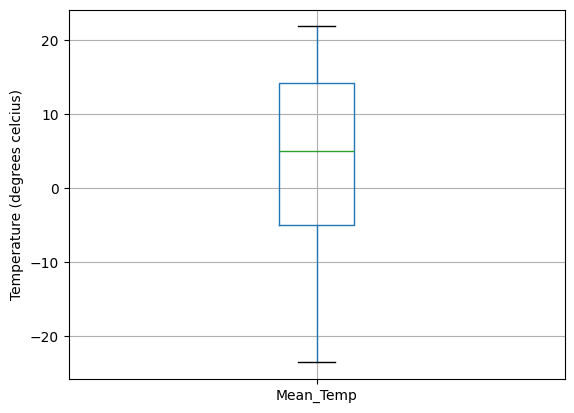

In [12]:
axes = climate_df.boxplot(column='Mean_Temp')
axes.set_ylabel('Temperature (degrees Celcius)')
plt.show()

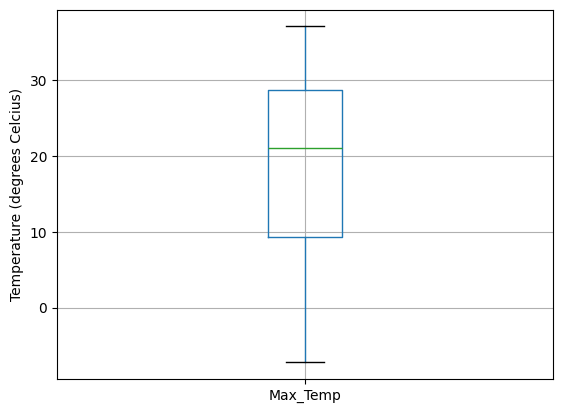

In [5]:
axes = climate_df.boxplot(column='Max_Temp')
axes.set_ylabel('Temperature (degrees Celcius)')
plt.show()

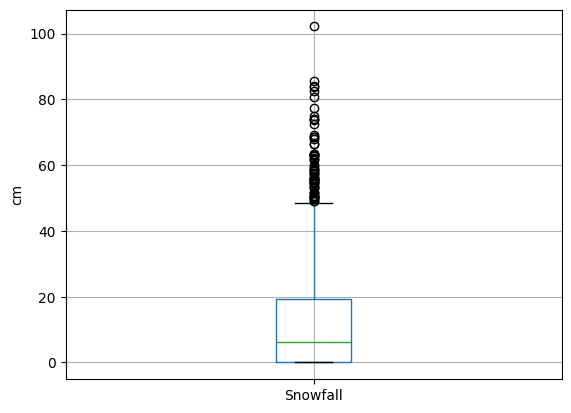

In [8]:
axes = climate_df.boxplot(column='Snowfall')
axes.set_ylabel('cm')
plt.show()

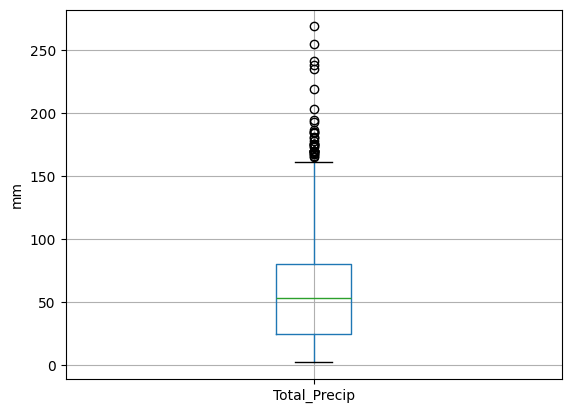

In [9]:
axes = climate_df.boxplot(column='Total_Precip')
axes.set_ylabel('mm')
plt.show()

<Axes: ylabel='Frequency'>

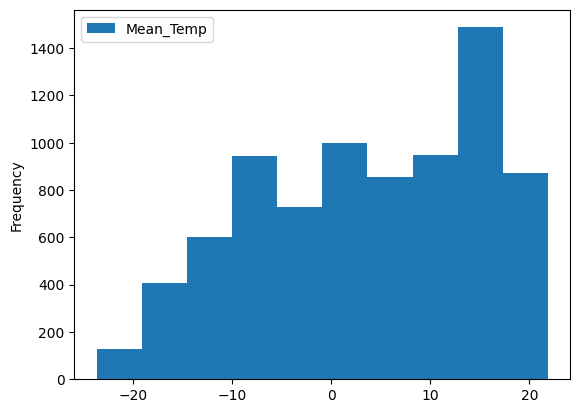

In [43]:
# histograms for mean_temp, max_temp, snowfall, total_precip
combined_df.plot.hist(column=["Mean_Temp"])

<Axes: ylabel='Frequency'>

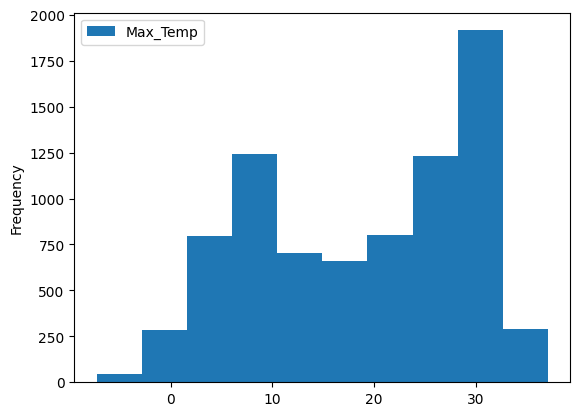

In [44]:
combined_df.plot.hist(column=["Max_Temp"])

<Axes: ylabel='Frequency'>

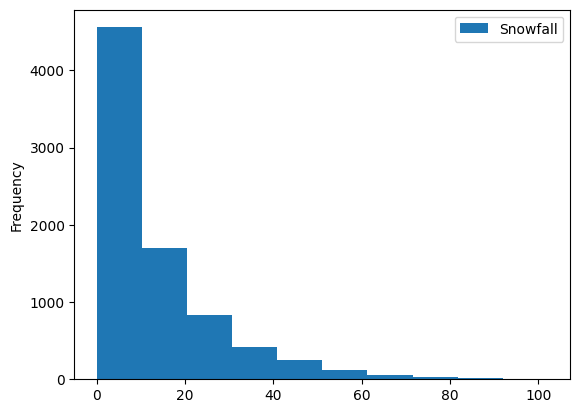

In [45]:
combined_df.plot.hist(column=["Snowfall"])

<Axes: ylabel='Frequency'>

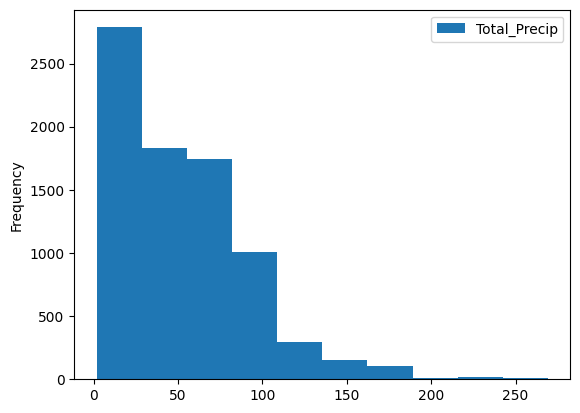

In [46]:
combined_df.plot.hist(column=["Total_Precip"])

In [4]:
fact_df = pd.read_csv("datasets/cropFactTable.csv")

prices = fact_df['Price']
volumes = fact_df['Volume']
value = fact_df['Total_Value']

# Region Dimension


In [10]:
# Total Area 
region_df = pd.read_csv("datasets/region_dim_binned_encoded.csv")
region_df.head()

,Region_ID,Name_EN,Name_FR,Abbrev_EN,Abbrev_FR,AlphaCode,NumericCode,GeographicRegion,Area_Percent,Area,...,Prince Edward Island,Quebec,Saskatchewan,Territories,Yukon,Atlantic_Region,British Columbia_Region,Canada_Region,Prairies_Region,Territories_Region
0,0,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,NL,10,Atlantic,4.1,405212.0,...,False,False,False,False,False,True,False,False,False,False
1,1,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,PE,11,Atlantic,0.1,5660.0,...,True,False,False,False,False,True,False,False,False,False
2,2,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,NS,12,Atlantic,0.6,55284.0,...,False,False,False,False,False,True,False,False,False,False
3,3,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,NS,12,Atlantic,0.6,55284.0,...,False,False,False,False,False,True,False,False,False,False
4,4,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,NB,13,Atlantic,0.7,72908.0,...,False,False,False,False,False,True,False,False,False,False


In [12]:
region_df.columns

Index(['Region_ID', 'Name_EN', 'Name_FR', 'Abbrev_EN', 'Abbrev_FR',
       'AlphaCode', 'NumericCode', 'GeographicRegion', 'Area_Percent', 'Area',
       'Land', 'LandOfArea_Percent', 'Freshwater', 'FreshwaterOfArea_Percent',
       'EffectiveDate', 'Population_Lower', 'Population_Upper',
       'Population_Binned_Encoded', 'Area_Binned', 'Area_Binned_Encoded',
       'Land_Binned', 'Land_Binned_Encoded', 'LandOfArea_Percent_Binned',
       'LandOfArea_Percent_Binned_Encoded', 'Freshwater_Binned',
       'Freshwater_Binned_Encoded', 'FreshwaterOfArea_Percent_Binned',
       'FreshwaterOfArea_Percent_Binned_Encoded', 'Alberta', 'Atlantic',
       'British Columbia', 'Canada', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Northwest Territories', 'Nova Scotia',
       'Nunavut', 'Ontario', 'Prairies', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Territories', 'Yukon', 'Atlantic_Region',
       'British Columbia_Region', 'Canada_Region', 'Prairies_Region',


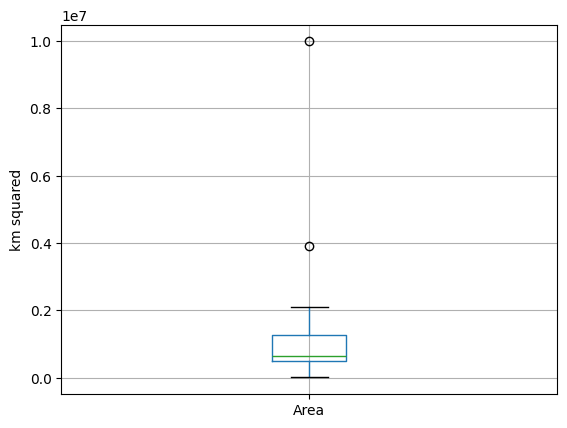

In [11]:
axes = region_df.boxplot(column='Area')
axes.set_ylabel('km squared')
plt.show()


<Axes: xlabel='Area', ylabel='Total_Value'>

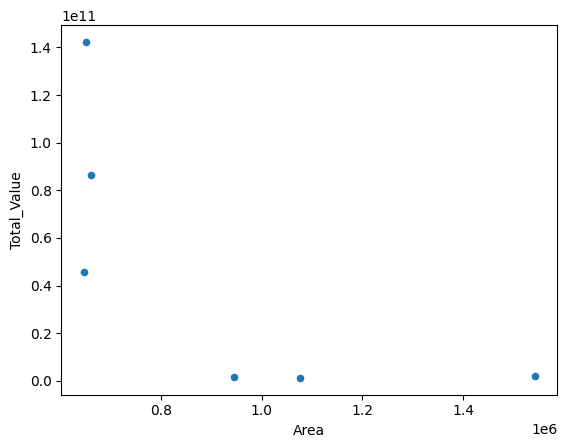

In [48]:
total_value_by_area = combined_df.groupby('Area')['Total_Value'].sum().reset_index()
total_value_by_area.plot.scatter(x = 'Area', y = 'Total_Value')

In [20]:
# total value based on area
total_value_by_region = combined_df.groupby('Name_EN')['Total_Value'].sum().reset_index()
total_value_by_region.set_index('Name_EN',inplace=True)

<Axes: title={'center': 'Total Value by Region'}, xlabel='Name_EN', ylabel='Total_Value'>

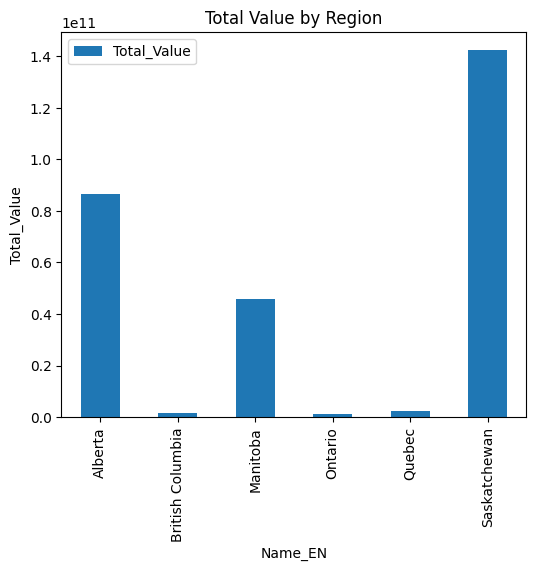

In [21]:
total_value_by_region.plot(kind='bar', title='Total Value by Region', ylabel='Total_Value',
         xlabel='Name_EN', figsize=(6, 5))

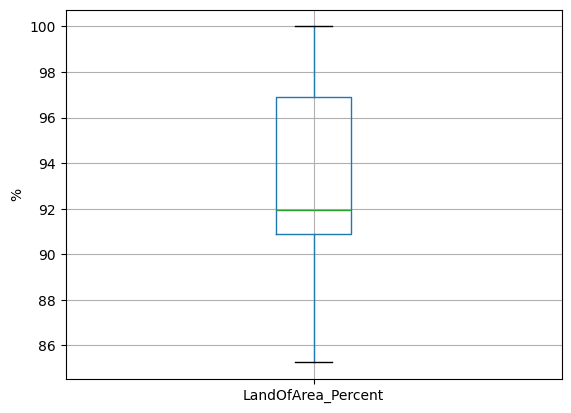

In [13]:
axes = region_df.boxplot(column='LandOfArea_Percent')
axes.set_ylabel('%')
plt.show()

<Axes: xlabel='LandOfArea_Percent', ylabel='Total_Value'>

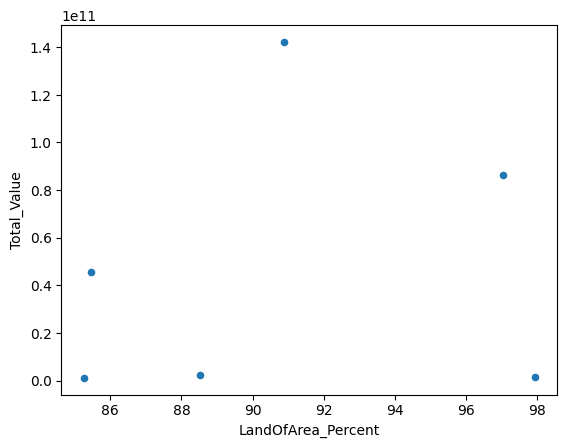

In [49]:
total_value_by_land = combined_df.groupby('LandOfArea_Percent')['Total_Value'].sum().reset_index()
total_value_by_land.plot.scatter(x = 'LandOfArea_Percent', y = 'Total_Value')

<Axes: xlabel='FreshwaterOfArea_Percent', ylabel='Total_Value'>

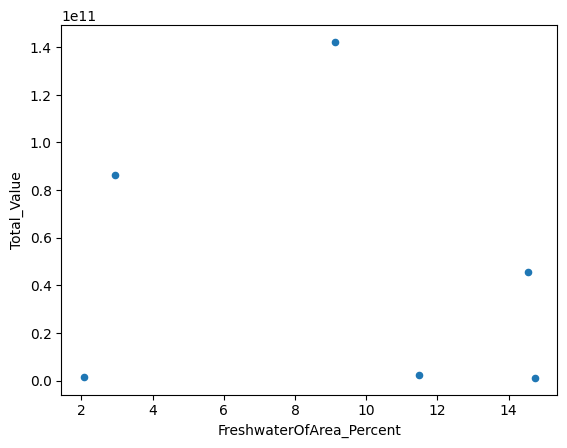

In [50]:
total_value_by_freshwater = combined_df.groupby('FreshwaterOfArea_Percent')['Total_Value'].sum().reset_index()
total_value_by_freshwater.plot.scatter(x = 'FreshwaterOfArea_Percent', y = 'Total_Value')

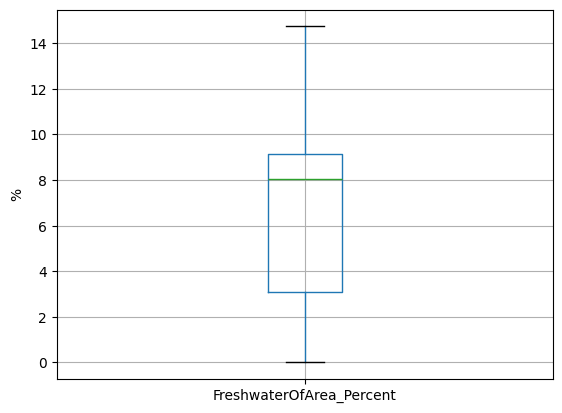

In [14]:
axes = region_df.boxplot(column='FreshwaterOfArea_Percent')
axes.set_ylabel('%')
plt.show()

Climate - Histograms
•	Days with Precipitation
•	Total_Precip
•	Mean_Temp 
•	Max_Temp

In [14]:
# total value based on days with precipitaion binned enocded 
total_value_by_precip = combined_df.groupby('Total_Precip_Binned_Encoded')['Total_Value'].sum().reset_index()
total_value_by_precip

,Total_Precip_Binned_Encoded,Total_Value
0,0,1.976160e+10
1,1,1.496056e+10
2,2,1.799687e+10
3,3,1.805182e+10
4,4,1.723085e+10
5,5,1.552035e+10
6,6,1.521252e+10
7,7,1.672400e+10
8,8,9.231895e+09
9,9,1.174501e+10


<Axes: xlabel='Total_Precip_Binned_Encoded', ylabel='Total_Value'>

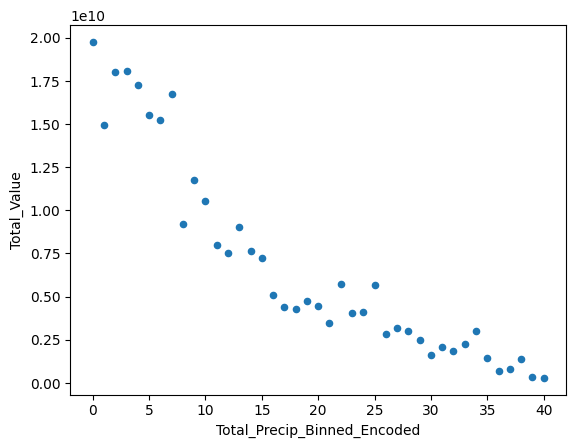

In [16]:
total_value_by_precip.plot.scatter(x = 'Total_Precip_Binned_Encoded', y = 'Total_Value')

In [17]:
# total value based on days with precipitaion binned enocded 
total_value_by_precip_days = combined_df.groupby('Days_with_Precip_Binned_Encoded')['Total_Value'].sum().reset_index()
total_value_by_precip_days

,Days_with_Precip_Binned_Encoded,Total_Value
0,0,2.057307e+10
1,1,2.140916e+10
2,2,1.965665e+10
3,3,1.703929e+10
4,4,1.438003e+10
5,5,1.321190e+10
6,6,1.129614e+10
7,7,9.639553e+09
8,8,1.345308e+10
9,9,1.133884e+10


<Axes: xlabel='Days_with_Precip_Binned_Encoded', ylabel='Total_Value'>

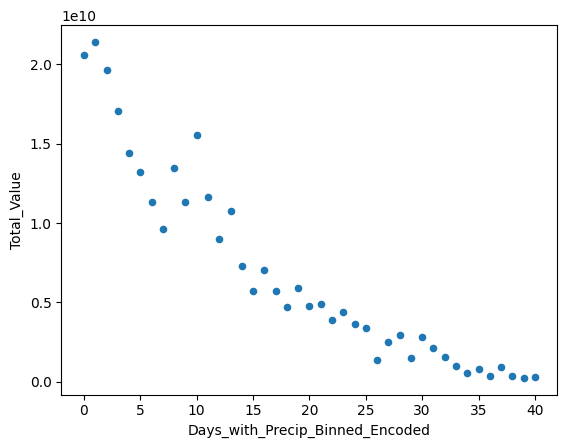

In [18]:
total_value_by_precip_days.plot.scatter(x = 'Days_with_Precip_Binned_Encoded', y = 'Total_Value')

In [5]:
# total value based on mean_temp binned enocded 
total_value_by_mean_temp = combined_df.groupby('Mean_Temp_Binned_Encoded')['Total_Value'].sum().reset_index()
total_value_by_mean_temp

,Mean_Temp_Binned_Encoded,Total_Value
0,0,1.101995e+10
1,1,9.993124e+09
2,2,1.055819e+10
3,3,1.052915e+10
4,4,6.847761e+09
5,5,7.578044e+09
6,6,1.200490e+10
7,7,8.551504e+09
8,8,1.001018e+10
9,9,6.348672e+09


<Axes: xlabel='Mean_Temp_Binned_Encoded', ylabel='Total_Value'>

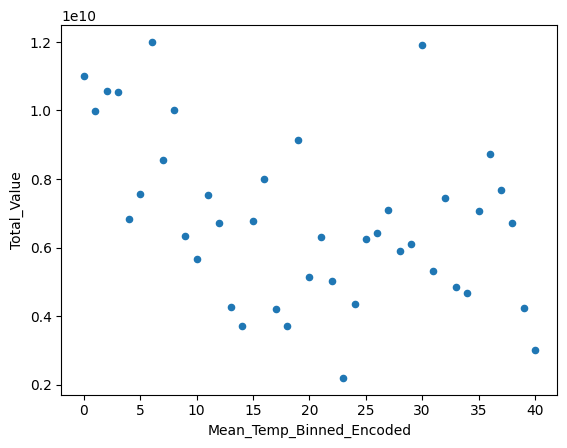

In [7]:
total_value_by_mean_temp.plot.scatter(x = 'Mean_Temp_Binned_Encoded', y = 'Total_Value')

In [8]:
# total value based on max_temp binned enocded 
total_value_by_max_temp = combined_df.groupby('Max_Temp_Binned_Encoded')['Total_Value'].sum().reset_index()
total_value_by_max_temp

,Max_Temp_Binned_Encoded,Total_Value
0,0,7.578636e+09
1,1,9.653000e+09
2,2,1.223298e+10
3,3,7.162197e+09
4,4,9.942456e+09
5,5,6.891020e+09
6,6,6.115186e+09
7,7,1.067537e+10
8,8,5.102849e+09
9,9,4.328085e+09


<Axes: xlabel='Max_Temp_Binned_Encoded', ylabel='Total_Value'>

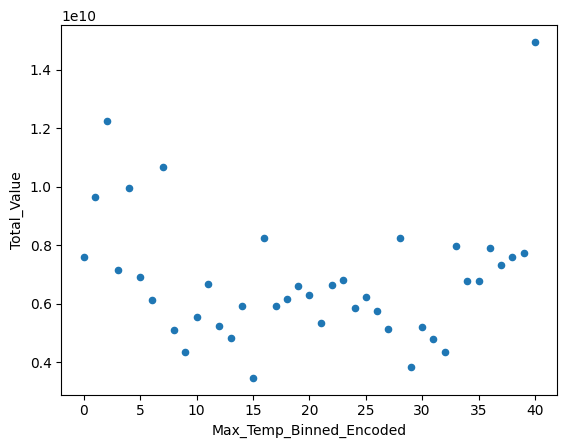

In [9]:
total_value_by_max_temp.plot.scatter(x = 'Max_Temp_Binned_Encoded', y = 'Total_Value')

In [10]:
# total value based on max_temp binned enocded 
total_value_by_snow = combined_df.groupby('Snowfall_Binned_Encoded')['Total_Value'].sum().reset_index()
total_value_by_snow

,Snowfall_Binned_Encoded,Total_Value
0,0,7.042143e+10
1,1,4.300434e+09
2,2,2.288598e+09
3,3,7.230898e+09
4,4,2.126193e+09
5,5,5.729081e+09
6,6,2.998567e+09
7,7,3.546368e+09
8,8,7.711006e+09
9,9,5.289274e+09


<Axes: xlabel='Snowfall_Binned_Encoded', ylabel='Total_Value'>

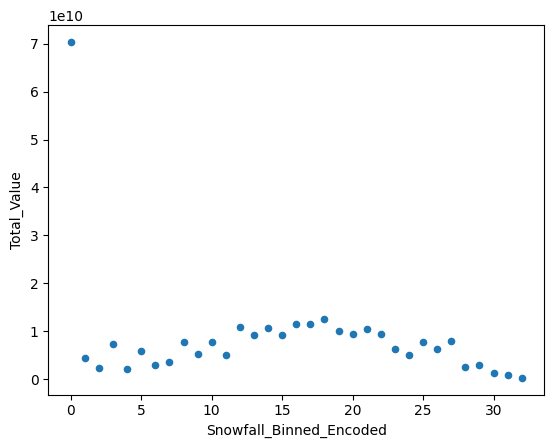

In [12]:
total_value_by_snow.plot.scatter(x = 'Snowfall_Binned_Encoded', y = 'Total_Value')

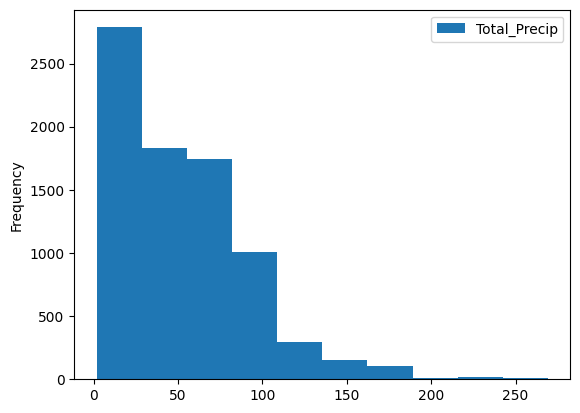

In [12]:
ax = combined_df.plot.hist(column=["Total_Precip"])

#Date Dimension

In [ ]:
# Date_ID

In [22]:
# total value based on max_temp binned enocded 
total_value_by_year = combined_df.groupby('Year')['Total_Value'].sum().reset_index()
total_value_by_year

,Year,Total_Value
0,2001,2.872911e+09
1,2002,2.865001e+09
2,2003,2.809040e+09
3,2004,3.091568e+09
4,2005,2.683382e+09
5,2006,3.430292e+09
6,2007,5.065562e+09
7,2008,6.867213e+09
8,2009,6.457946e+09
9,2010,6.720799e+09


<Axes: xlabel='Year'>

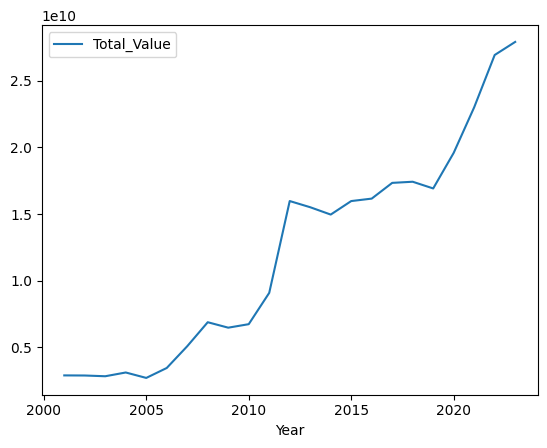

In [24]:
total_value_by_year.plot.line(x='Year', y='Total_Value')

In [25]:
# total value based on month
total_value_by_month = combined_df.groupby('Month')['Total_Value'].sum().reset_index()
total_value_by_month

,Month,Total_Value
0,1,2.290643e+10
1,2,2.146820e+10
2,3,2.528720e+10
3,4,2.072394e+10
4,5,1.701674e+10
5,6,2.319248e+10
6,7,2.105881e+10
7,8,1.876279e+10
8,9,3.147905e+10
9,10,2.738459e+10


<Axes: xlabel='Month'>

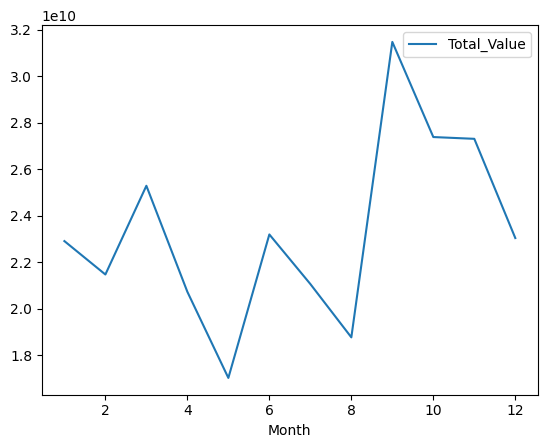

In [26]:
total_value_by_month.plot.line(x='Month', y='Total_Value')

In [28]:
# total value based on date
total_value_by_day = combined_df.groupby('Date_ID')['Total_Value'].sum().reset_index()
total_value_by_day

,Date_ID,Total_Value
0,0,2.520863e+08
1,1,2.380289e+08
2,2,3.401101e+08
3,3,1.831865e+08
4,4,2.153835e+08
...,...,...
271,271,2.060209e+09
272,272,2.866844e+09
273,273,2.160431e+09
274,274,2.582295e+09


<Axes: xlabel='Date_ID'>

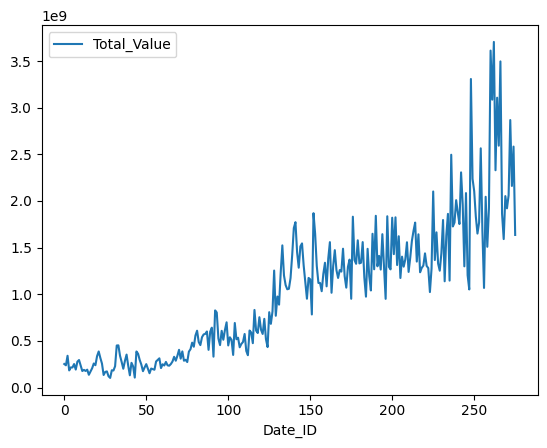

In [31]:
total_value_by_day.plot.line(x='Date_ID', y='Total_Value')

In [35]:
# Crop Dimension 
# total value based on crop
total_value_by_crop = combined_df.groupby('Common Name')['Total_Value'].sum().reset_index()
total_value_by_crop.set_index('Common Name',inplace=True)

<Axes: title={'center': 'Total Value by Crop'}, xlabel='Common Name', ylabel='Total_Value'>

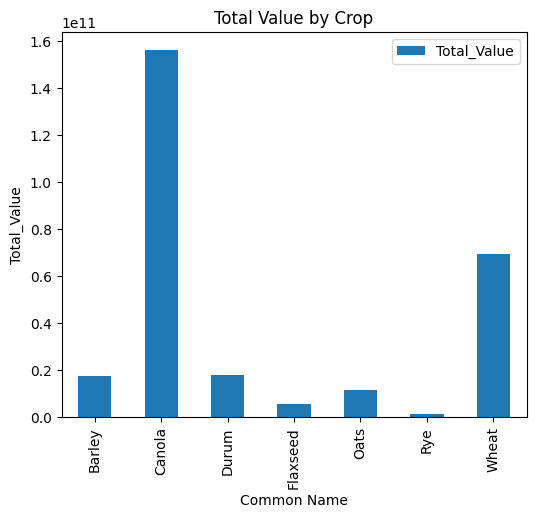

In [36]:
total_value_by_crop.plot(kind='bar', title='Total Value by Crop', ylabel='Total_Value',
         xlabel='Common Name', figsize=(6, 5))

<Axes: title={'center': 'Total Value by Species'}, xlabel='Species', ylabel='Total_Value'>

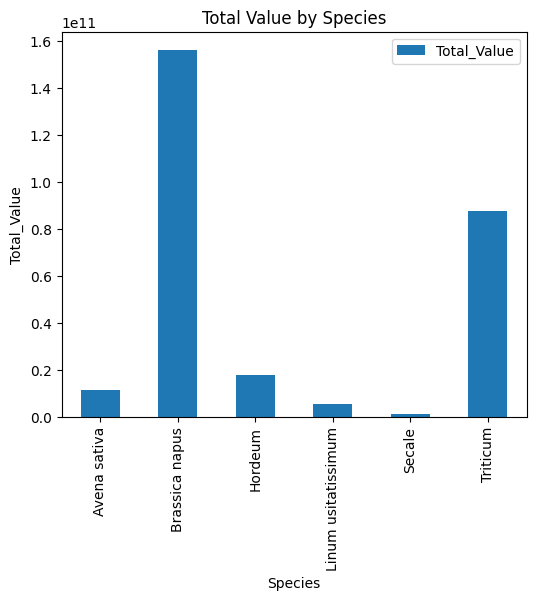

In [38]:
# total value based on species
total_value_by_species = combined_df.groupby('Species')['Total_Value'].sum().reset_index()
total_value_by_species.set_index('Species',inplace=True)
total_value_by_species.plot(kind='bar', title='Total Value by Species', ylabel='Total_Value',
         xlabel='Species', figsize=(6, 5))

<Axes: title={'center': 'Total Value by Family'}, xlabel='Family', ylabel='Total_Value'>

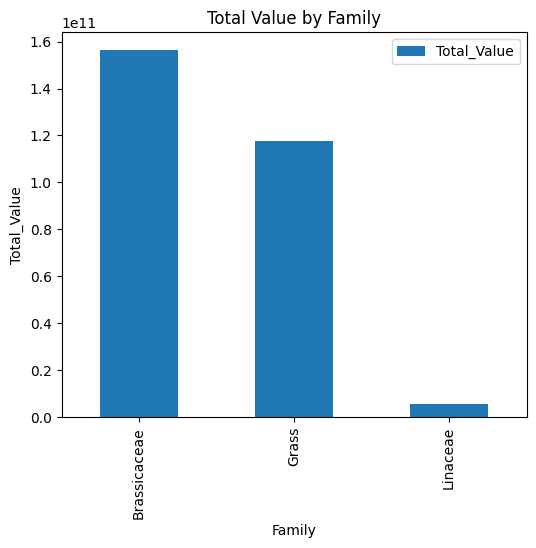

In [40]:
total_value_by_family = combined_df.groupby('Family')['Total_Value'].sum().reset_index()
total_value_by_family.set_index('Family',inplace=True)
total_value_by_family.plot(kind='bar', title='Total Value by Family', ylabel='Total_Value',
         xlabel='Family', figsize=(6, 5))